# Tienen orden las variables? 

In [5]:
# Tratamiento de datos
# -----------------------------------------------------------------------
import pandas as pd
import numpy as np
import sidetable

# Gráficos
# ------------------------------------------------------------------------------
import seaborn as sns
import matplotlib.pyplot as plt

# Transformación de los datos
# ------------------------------------------------------------------------------
from scipy import stats
import math 
from sklearn.preprocessing import MinMaxScaler

# Para la gestión de los warning
# ------------------------------------------------------------------------------
import warnings
warnings.filterwarnings('ignore')

# Para poder ver todas las columnas del dataframe
# ------------------------------------------------------------------------------
pd.options.display.max_columns = None 

#Para poder cambiar fechas
# ----------------------------------------------------------------------
from datetime import date, datetime
import calendar
import holidays

In [6]:
df = pd.read_pickle('../datos/01-bikes_sin_outliers.pickle')
df.head(2)

,instant,dteday,season,yr,mnth,holiday,weekday,workingday,weathersit,temp,atemp,hum,windspeed,casual,registered,cnt
0,1.0,01-01-2018,spring,0.0,1.0,0.0,6.0,0.0,2.0,14.110847,18.18125,80.5833,10.749882,331.0,654.0,985.0
1,2.0,02-01-2018,spring,0.0,1.0,0.0,0.0,0.0,2.0,14.902598,17.68695,69.6087,16.652113,131.0,670.0,801.0


# Variables : 

- instant	
- dteday	
- season	
- yr	
- mnth	
- holiday	
- weekday	
- workingday	
- weathersit	
- temp	
- atemp	
- hum	
- windspeed	
- casual	
- registered	
- cnt

- Si las variables categóricas **NO tienen** orden usaremos: 

    - One-Hot Encoding

    - get_dummies
---
- Si las variables categóricas **tienen** orden usaremos: 

    - Label-Encoding

    - map

    - Ordinal-Encoding

R lineal :- Lo modelos de **regresión lineal** son aquellos en los que la variable respuesta es de tipo continua

    Variable Alquiler de bicis

- Los modelos de **regresión lógistica** son aquellos cuya variable respuesta será una variable de tipo categórica.
        
        RLogistica : Es registrado o no'

1. Son variables Similares? 

In [7]:
def similar_variables(lista_variables,plot = True):
    for columna in lista_variables:
        print(' Los valores únicos para la variable',columna, 'son:', list( df[columna].unique()))
        value_counts = df[columna].value_counts()
        if plot == True:
            plt.figure()
            plt.grid()
            mycolors = ['#4c9c85','#a0c6b9','#c8dbd5','#f1f1f1','#eed4f4','#e9b8f8','#e39afb']
            value_counts.plot.pie(figsize=(12,8), shadow = True,colors = mycolors,autopct='%1.1f%%',textprops=({'size': 'smaller','color':"w"}))
            
        else:
            pass

In [8]:
df.columns

Index(['instant', 'dteday', 'season', 'yr', 'mnth', 'holiday', 'weekday',
       'workingday', 'weathersit', 'temp', 'atemp', 'hum', 'windspeed',
       'casual', 'registered', 'cnt'],
      dtype='object')

 Los valores únicos para la variable season son: ['spring', 'summer', 'autumn', 'winter', nan]
 Los valores únicos para la variable mnth son: [1.0, 2.0, 3.0, 4.0, 5.0, 6.0, 7.0, 8.0, 9.0, 10.0, 11.0, 12.0, nan]


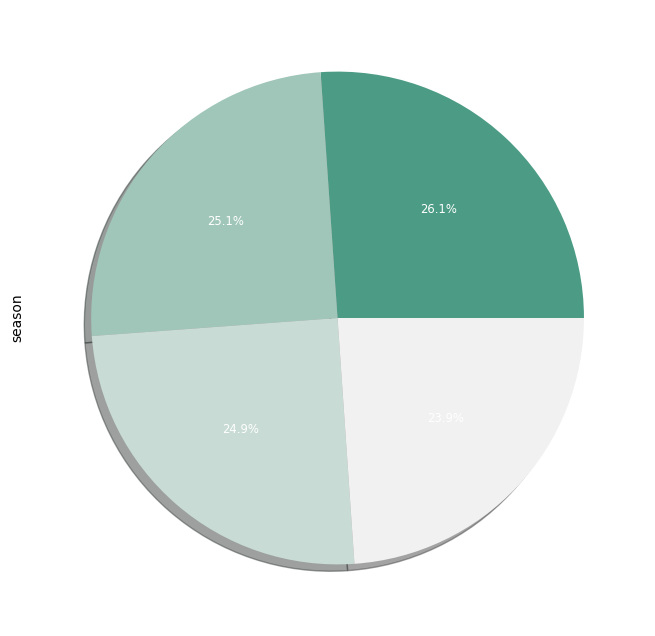

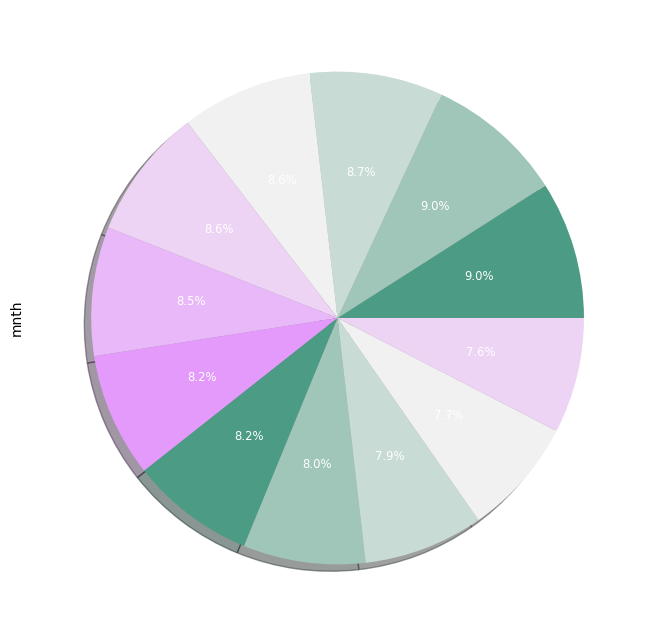

In [9]:
lista_columnas = ['season','mnth']
similar_variables(lista_columnas)

In [10]:
categoricas= df.select_dtypes(include='object')
categoricas.head(10)

,dteday,season
0,01-01-2018,spring
1,02-01-2018,spring
2,03-01-2018,spring
3,04-01-2018,spring
4,05-01-2018,spring
5,06-01-2018,spring
6,07-01-2018,spring
7,08-01-2018,spring
8,09-01-2018,spring
9,10-01-2018,spring


No handles with labels found to put in legend.
No handles with labels found to put in legend.


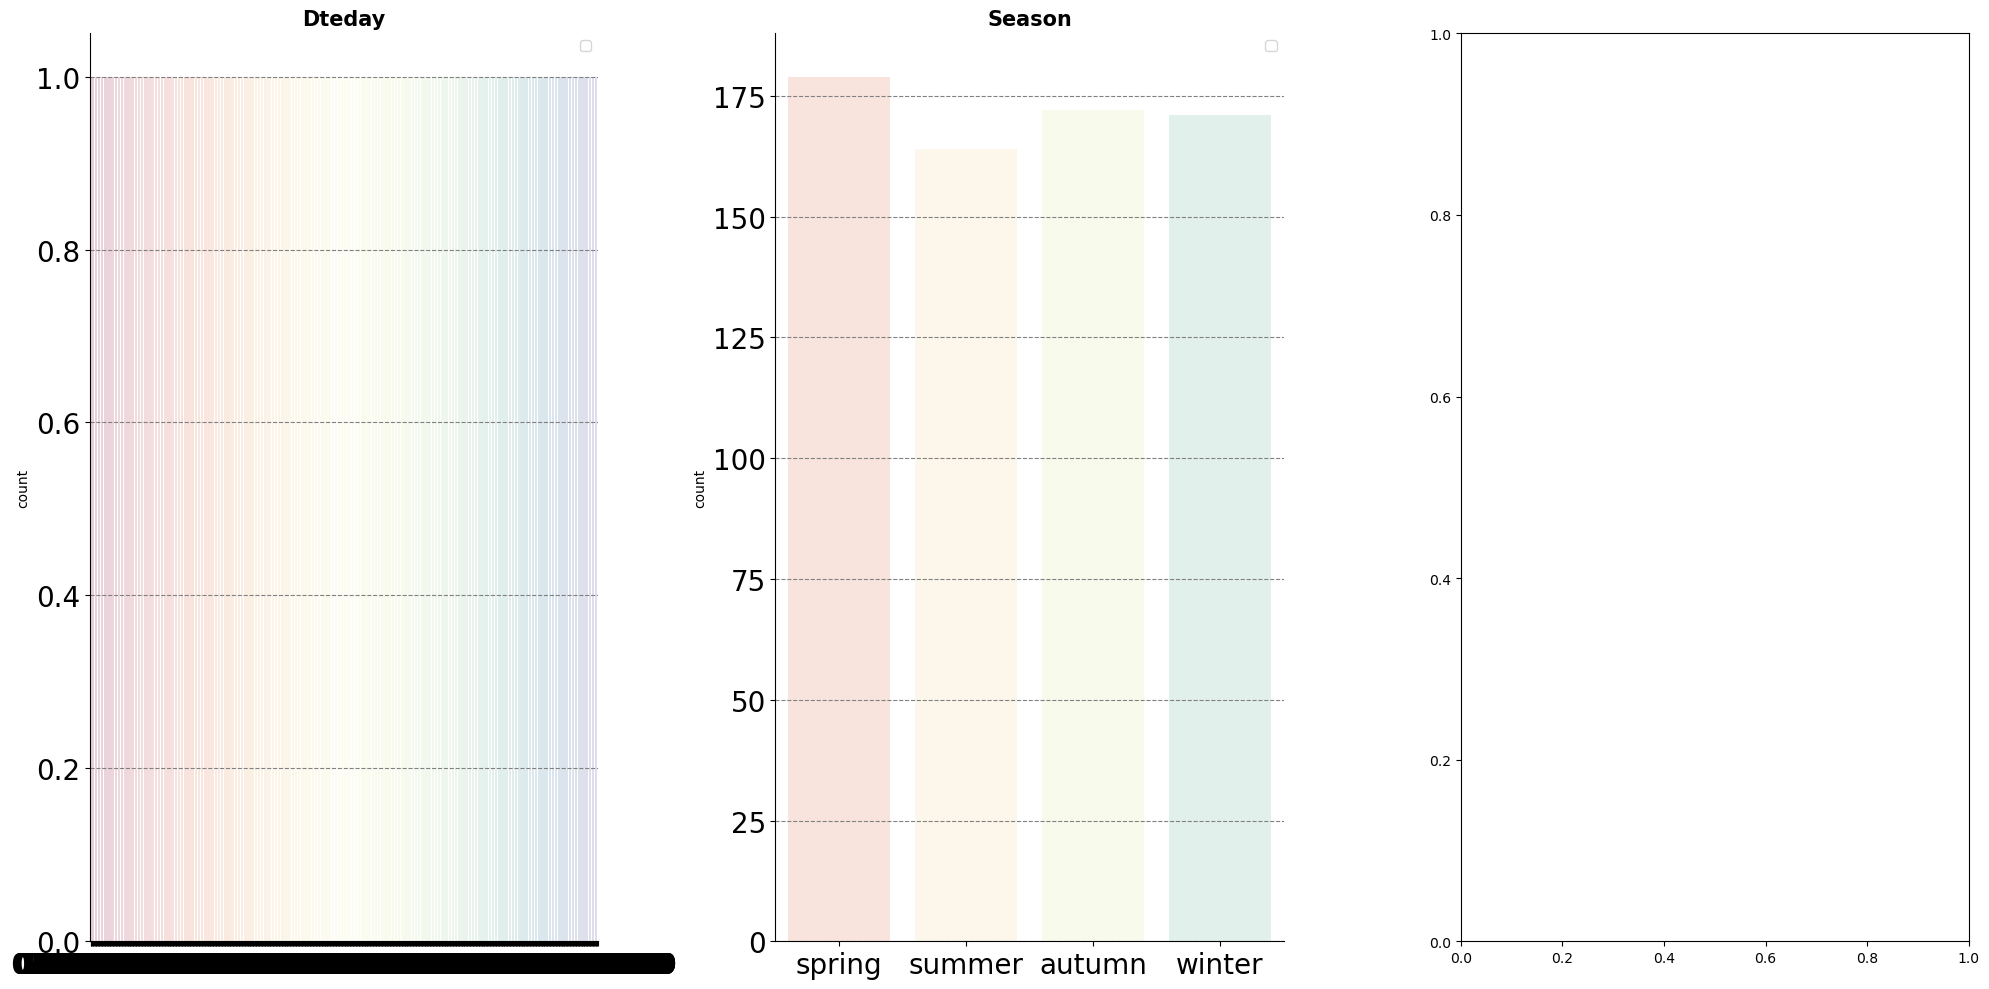

In [11]:
# Gráfico de distribución para cada variable categórica
# ==============================================================================

fig, axes = plt.subplots(nrows = 1, ncols = 3, figsize = (20,10))

axes = axes.flat
columnas_cat = categoricas.columns

for i, colum in enumerate(columnas_cat):
    sns.countplot(
        data = df,
        x = colum,
        #hue = "registered",
        alpha = 0.2,
        palette = 'Spectral', 
        ax = axes[i])
    
    
    axes[i].set_title(colum.capitalize(), fontsize = 15, fontweight = "bold")#titulos con letra mayuscula
    axes[i].tick_params(labelsize = 20)
    axes[i].set_xlabel("")
    axes[i].legend(loc= "upper right")
    axes[i].grid(axis = 'y', color = 'gray', linestyle = 'dashed')# pon el grid
    axes[i].spines['right'].set_visible(False)# borra los bordes
    axes[i].spines['top'].set_visible(False)

fig.tight_layout();

Primero saber los valores unicos

In [12]:
df.season.unique()

array(['spring', 'summer', 'autumn', 'winter', nan], dtype=object)

¿ el hecho de que sea invierno/verano/otoño/primavera puede hacer que el alquiler de las bicis por los registrados cambie significativamente? 
- A la vista de las graficas NO, por lo tanto la cariable tiene TIENE ORDEN

In [13]:
df.holiday.unique()

array([ 0., nan])

¿ el hecho de que sea festivo/no festivo puede hacer que el alquiler de las bicis por los registrados cambie significativamente? 
- A la vista de las graficas SI, por lo tanto la cariable tiene ORDEN


In [14]:
df.workingday.unique()

array([ 0.,  1., nan])

¿ el hecho de que sea laborable/finde puede hacer que el alquiler de las bicis por los registrados cambie significativamente? 
- A la vista de las graficas SI, por lo tanto la cariable tiene ORDEN

---

season - mnth = dependiente

season - holiday = dependiente

season - weathersit = dependiente

season - temp = dependiente

mnth - weathersit = dependiente

mnth - temp = dependiente

holiday - weekday = dependiente

weekday - workingday = dependiente

'weathersit', 'hum' = dependiente

temp - atemp = dependiente

temp- hum = dependiente

temp- windspeed = dependiente

hum - windspeed = dependiente

# No se guardan archivos